In [1]:
import sys
sys.path.append('/home/apoorva/Desktop/Work/olr')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import optuna
from sklearn.metrics import f1_score
from scripts.utils.load import load_pca_anomaly
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

/home/apoorva/anaconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
olr = np.load("../../datasets/raw/OLR_1979_2019_MJJAS_30S_30N_80W_150E.npy")

In [4]:
pca_x, olr_labels = load_pca_anomaly()
pca_x.shape, olr_labels.shape

((5960, 5960), (40, 135))

In [5]:
olr_labels = np.reshape(np.reshape(olr_labels, (40, 135))[:, 1:], -1)

pca_x_50 = pca_x[:, :50]
pca_x_50 = np.array([pca_x_50[i*40+j:i*40+j+15, :] for j in range(134) for i in range(40)])
pca_x_50.shape, olr_labels.shape

((5360, 15, 50), (5360,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(pca_x_50, olr_labels, random_state=1337, train_size=0.875, stratify=olr_labels)

Best classifier (test data) for first pentad was XGB with following params from Optuna

In [8]:
classifier = XGBClassifier(
    max_depth=5,
    learning_rate=0.10560565743164968,
    n_estimators= 450,
    min_child_weight= 1,
    gamma= 0.012751472230109246,
    subsample= 0.03127736194247236,
    colsample_bytree= 0.028886963481484302,
    reg_alpha= 7.287349136824299e-07,
    reg_lambda= 0.0023336701558706228,
)

In [9]:
X_train = np.reshape(X_train, (4690, -1))
X_test = np.reshape(X_test, (670, -1))
X_test.shape, X_train.shape

((670, 750), (4690, 750))

In [10]:
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_train)
print(confusion_matrix(y_pred=y_pred, y_true=y_train))
print(classification_report(y_pred=y_pred, y_true=y_train))

y_pred = classifier.predict(X_test)
print(confusion_matrix(y_pred=y_pred, y_true=y_test))
print(classification_report(y_pred=y_pred, y_true=y_test))

[[ 210  340   64]
 [ 289 2824  288]
 [  77  385  213]]
              precision    recall  f1-score   support

         0.0       0.36      0.34      0.35       614
         1.0       0.80      0.83      0.81      3401
         2.0       0.38      0.32      0.34       675

    accuracy                           0.69      4690
   macro avg       0.51      0.50      0.50      4690
weighted avg       0.68      0.69      0.68      4690

[[ 18  56  14]
 [ 58 350  78]
 [ 16  62  18]]
              precision    recall  f1-score   support

         0.0       0.20      0.20      0.20        88
         1.0       0.75      0.72      0.73       486
         2.0       0.16      0.19      0.17        96

    accuracy                           0.58       670
   macro avg       0.37      0.37      0.37       670
weighted avg       0.59      0.58      0.58       670



In [11]:
y_pred = classifier.predict(np.reshape(pca_x_50, (5360, -1)))
y_pred.shape

(5360,)

In [12]:
olr_labels.shape

(5360,)

In [13]:
zero_idx = np.array([i for i in range(5360) if y_pred[i] == 0 and olr_labels[i] == 0])
one_idx = np.array([i for i in range(5360) if y_pred[i] == 1 and olr_labels[i] == 1])
two_idx = np.array([i for i in range(5360) if y_pred[i] == 2 and olr_labels[i] == 2])

In [14]:
zero_idx.shape, one_idx.shape, two_idx.shape

((228,), (3174,), (231,))

## Active Phase

In [15]:
zero_idx

array([  80,   81,   82,  153,  168,  234,  305,  306,  328,  350,  400,
        419,  495,  499,  500,  537,  540,  542,  578,  579,  581,  582,
        624,  651,  693,  694,  697,  746,  753,  754,  761,  837,  840,
        872, 1036, 1038, 1039, 1112, 1113, 1149, 1352, 1353, 1354, 1374,
       1384, 1386, 1388, 1436, 1473, 1540, 1573, 1615, 1616, 1679, 1680,
       1681, 1699, 1701, 1719, 1720, 1723, 1780, 1792, 1793, 1795, 1799,
       1800, 1802, 1872, 1873, 1903, 1904, 1905, 1909, 1913, 1940, 1953,
       1976, 1977, 1982, 2069, 2071, 2075, 2076, 2077, 2116, 2177, 2178,
       2180, 2214, 2238, 2240, 2352, 2353, 2374, 2377, 2462, 2548, 2578,
       2579, 2580, 2582, 2610, 2664, 2665, 2666, 2668, 2669, 2681, 2698,
       2700, 2701, 2702, 2736, 2740, 2741, 2814, 2831, 2832, 2842, 2845,
       2956, 2985, 2987, 3039, 3118, 3120, 3151, 3188, 3193, 3214, 3215,
       3243, 3248, 3297, 3298, 3300, 3303, 3390, 3391, 3392, 3394, 3398,
       3425, 3468, 3471, 3472, 3486, 3498, 3502, 35

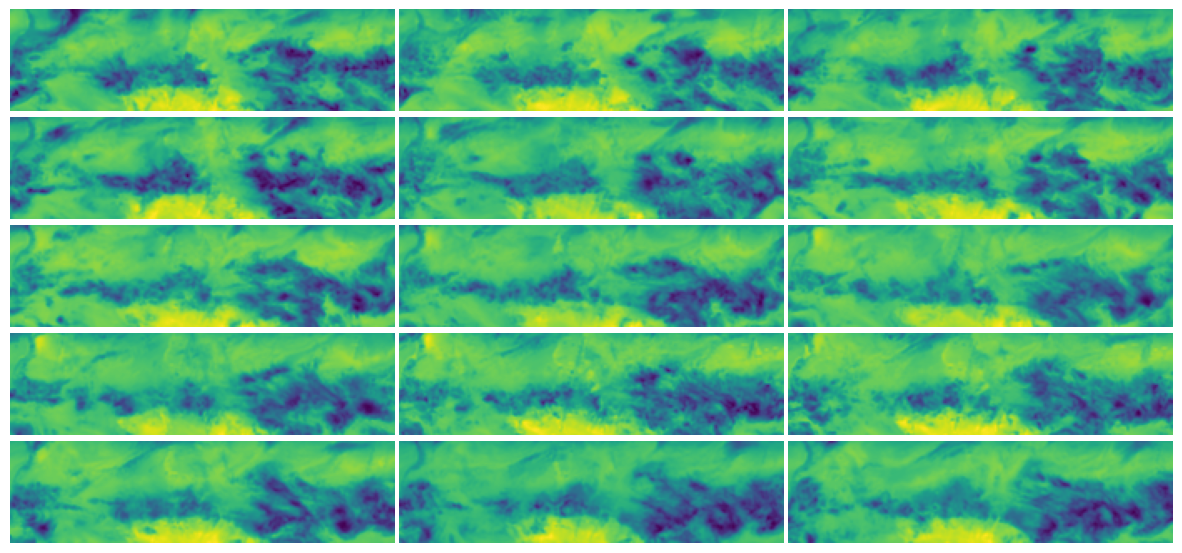

In [16]:
fig, ax = plt.subplots(5, 3, figsize=(15, 7))
plt.subplots_adjust(wspace=0.01, hspace=0.01)
for i in range(15):
    ax[i//3, i%3].imshow(olr[0, i+zero_idx[0], :, :])
    ax[i//3, i%3].axis("off")

(-0.5, 49.5, 14.5, -0.5)

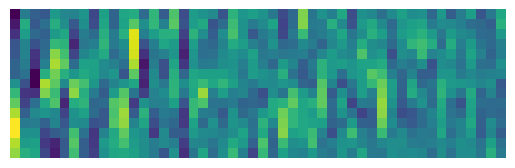

In [17]:
plt.imshow(pca_x_50[zero_idx[0], :, :])
plt.axis("off")

## Neutral Phase

In [18]:
one_idx[:200]

array([  1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  18,  20,  21,  22,  23,  24,  26,  27,  28,  29,  31,  32,
        33,  34,  36,  39,  41,  42,  43,  44,  52,  53,  61,  62,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  75,  76,  77,  78,
        86, 119, 122, 125, 126, 127, 129, 130, 133, 134, 137, 138, 141,
       142, 143, 144, 145, 146, 148, 149, 150, 157, 158, 159, 161, 162,
       163, 164, 165, 166, 176, 177, 178, 179, 180, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 195, 197, 198, 199, 202, 204, 205,
       208, 209, 210, 212, 213, 214, 216, 219, 220, 221, 222, 223, 224,
       228, 229, 231, 232, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 253, 254, 256, 259, 260, 261, 262, 263, 264,
       265, 266, 267, 268, 271, 272, 277, 278, 279, 280, 281, 282, 283,
       284, 285, 286, 287, 289, 290, 291, 292, 293, 301, 302, 303, 307,
       308, 309, 311, 313, 315, 316, 318, 321, 322, 323, 324, 32

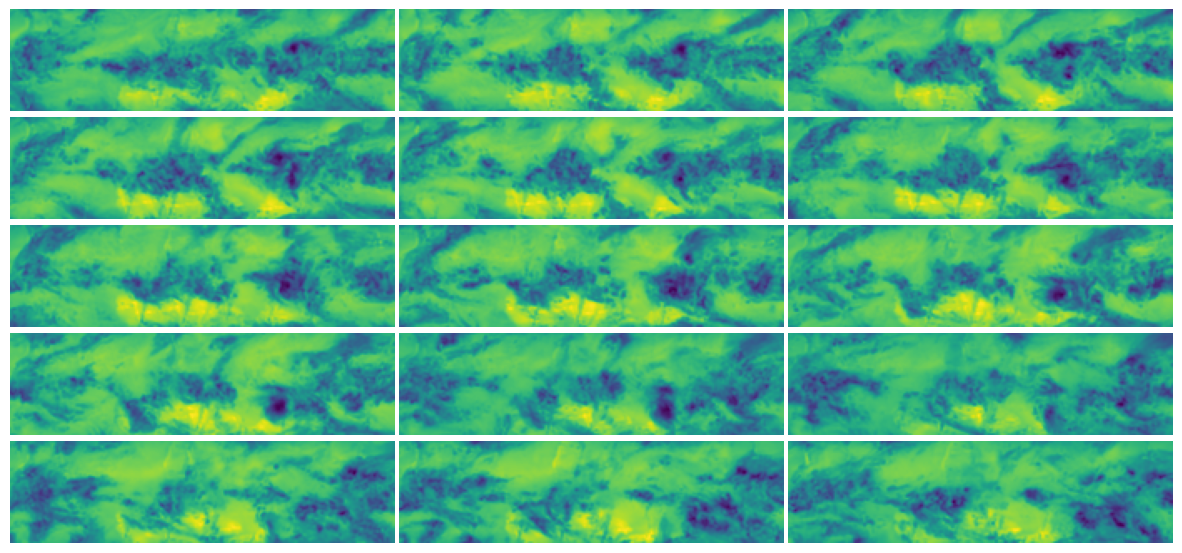

In [19]:
fig, ax = plt.subplots(5, 3, figsize=(15, 7))
plt.subplots_adjust(wspace=0.01, hspace=0.01)
for i in range(15):
    ax[i//3, i%3].imshow(olr[0, i+one_idx[0], :, :])
    ax[i//3, i%3].axis("off")

(-0.5, 49.5, 14.5, -0.5)

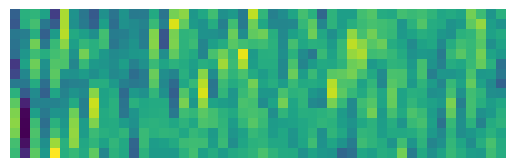

In [20]:
plt.imshow(pca_x_50[one_idx[0], :, :])
plt.axis("off")

## Break Phase

In [21]:
two_idx

array([  47,   49,   87,   91,   92,   93,  103,  104,  106,  109,  112,
        114,  376,  440,  443,  444,  448,  461,  587,  589,  590,  593,
        594,  707,  727,  739,  743,  800,  852,  878,  879,  904,  905,
        907,  909,  912,  917,  978,  998, 1000, 1014, 1015, 1018, 1019,
       1020, 1022, 1027, 1177, 1266, 1280, 1316, 1320, 1513, 1590, 1591,
       1599, 1648, 1650, 1653, 1654, 1655, 1656, 1657, 1659, 1662, 1730,
       1731, 1735, 1739, 1805, 1806, 1810, 1816, 1824, 1825, 1839, 2007,
       2055, 2059, 2060, 2138, 2188, 2189, 2192, 2193, 2194, 2195, 2229,
       2269, 2361, 2362, 2365, 2367, 2368, 2386, 2477, 2478, 2481, 2482,
       2504, 2506, 2508, 2587, 2589, 2597, 2640, 2644, 2647, 2729, 2754,
       2755, 2759, 2760, 2776, 2798, 2892, 2893, 2915, 2924, 2926, 2928,
       2929, 2932, 2933, 2939, 2940, 2996, 2998, 3006, 3008, 3014, 3017,
       3073, 3252, 3253, 3254, 3255, 3256, 3258, 3283, 3321, 3326, 3329,
       3330, 3415, 3433, 3438, 3439, 3449, 3450, 34

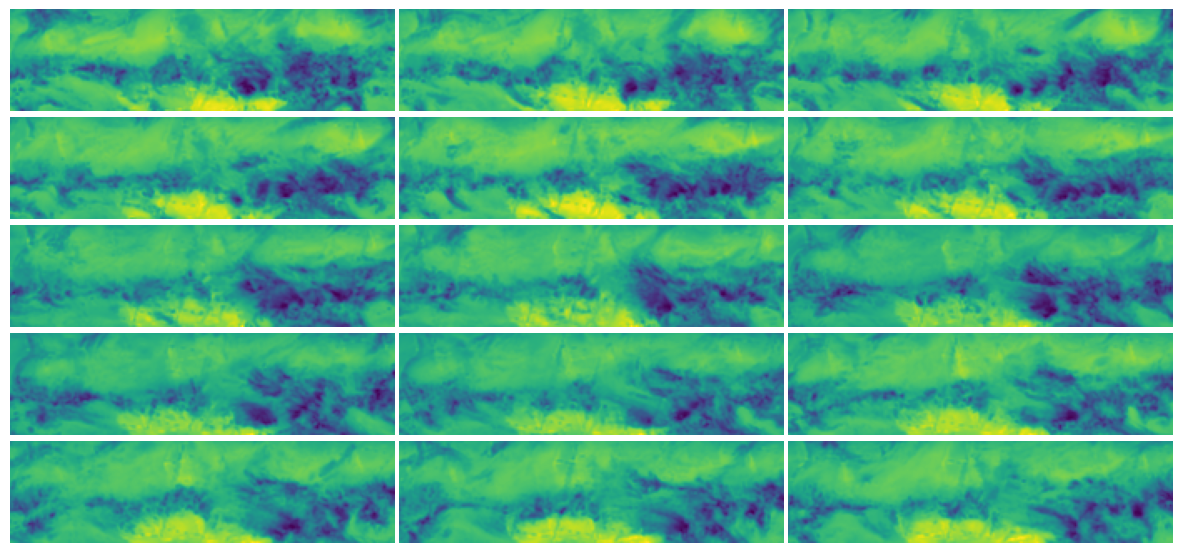

In [22]:
fig, ax = plt.subplots(5, 3, figsize=(15, 7))
plt.subplots_adjust(wspace=0.01, hspace=0.01)
for i in range(15):
    ax[i//3, i%3].imshow(olr[0, i+two_idx[0], :, :])
    ax[i//3, i%3].axis("off")

(-0.5, 49.5, 14.5, -0.5)

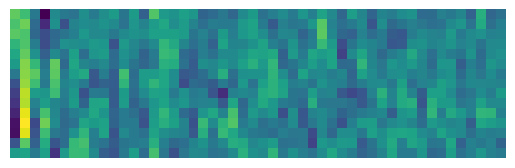

In [23]:
plt.imshow(pca_x_50[two_idx[0], :, :])
plt.axis("off")